In [71]:
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

In [2]:
climate_df = pd.read_csv("ClimateData.csv")

In [3]:
climate_df

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,0,Commercial,61242.0,1942.0,16.59,0.0,56.972603,NaN,248.68
1,1,Commercial,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50
2,2,Commercial,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69
3,3,Commercial,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41
4,4,Commercial,66000.0,1985.0,16.59,0.0,56.972603,NaN,3.90
...,...,...,...,...,...,...,...,...,...
75752,75752,Commercial,20410.0,1995.0,45.03,1.4,55.147541,NaN,132.92
75753,75753,Residential,40489.0,1910.0,45.03,1.4,55.147541,NaN,39.48
75754,75754,Commercial,28072.0,1917.0,106.32,36.6,47.911202,NaN,48.40
75755,75755,Commercial,53575.0,2012.0,106.32,36.6,47.911202,NaN,592.02


In [4]:
meta_df = pd.read_csv("Metadata.csv")
meta_df

,id,building id
0,building_class,building classification
1,floor_area,floor area (in square feet) of the building
2,year_built,year in which the building was constructed
3,precipitation_inches,annual precipitation in inches at the location...
4,snowfall_inches,annual snowfall in inches at the location of t...
5,avg_temp,average temperature over a year at the locatio...
6,days_with_fog,number of days with fog at the location of the...
7,eui,Site Energy Usage Intensity is the amount of h...


## 1. Please take a look at the data types and summary of our variables.

In [5]:
climate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    75757 non-null  int64  
 1   building_class        75757 non-null  object 
 2   floor_area            75757 non-null  float64
 3   year_built            73920 non-null  float64
 4   precipitation_inches  75757 non-null  float64
 5   snowfall_inches       75757 non-null  float64
 6   avg_temp              75757 non-null  float64
 7   days_with_fog         29961 non-null  float64
 8   site_eui              75757 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 5.2+ MB


## 2. Summarize the number of unique values in each column.

In [6]:
all_cols = climate_df.columns.tolist()
for col in all_cols:
    print('Count of unique values for ' + col + ':')
    print(climate_df[col].value_counts(sort = True))
    print()
    print('All unique values for ' + col + ':')
    print(climate_df[col].unique())
    print()

Count of unique values for id:
0        1
50493    1
50509    1
50508    1
50507    1
        ..
25252    1
25251    1
25250    1
25249    1
75756    1
Name: id, Length: 75757, dtype: int64

All unique values for id:
[    0     1     2 ... 75754 75755 75756]

Count of unique values for building_class:
Residential    43558
Commercial     32199
Name: building_class, dtype: int64

All unique values for building_class:
['Commercial' 'Residential']

Count of unique values for floor_area:
60000.0     264
70000.0     213
80000.0     176
75000.0     173
72000.0     173
           ... 
450500.0      1
354100.0      1
123290.0      1
133280.0      1
40489.0       1
Name: floor_area, Length: 20433, dtype: int64

All unique values for floor_area:
[ 61242. 274000. 280025. ... 103345.  36353.  40489.]

Count of unique values for year_built:
1927.0    2064
1929.0    1999
1928.0    1979
1930.0    1811
1925.0    1710
          ... 
1878.0       1
1829.0       1
1844.0       1
1871.0       1
1815.0     

## 3. Check at descriptive statistics for the Dataset

In [7]:
all_cols

['id',
 'building_class',
 'floor_area',
 'year_built',
 'precipitation_inches',
 'snowfall_inches',
 'avg_temp',
 'days_with_fog',
 'site_eui']

In [8]:
numerical_cols = sorted(set(all_cols) - set(['building_class']), key = all_cols.index)
numerical_cols

['id',
 'floor_area',
 'year_built',
 'precipitation_inches',
 'snowfall_inches',
 'avg_temp',
 'days_with_fog',
 'site_eui']

In [9]:
climate_df[numerical_cols].describe()

,id,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
count,75757.000000,7.575700e+04,73920.000000,75757.000000,75757.000000,75757.000000,29961.000000,75757.000000
mean,37878.000000,1.659839e+05,1952.306764,42.430651,29.136379,56.176705,109.142051,82.584707
std,21869.306509,2.468758e+05,37.053619,10.592205,17.810894,2.241940,50.699751,58.255413
min,0.000000,9.430000e+02,0.000000,0.000000,0.000000,44.512329,12.000000,1.000000
25%,18939.000000,6.237900e+04,1927.000000,39.350000,9.600000,55.147541,88.000000,54.530000
50%,37878.000000,9.136700e+04,1951.000000,42.170000,31.600000,56.835616,104.000000,75.290000
75%,56817.000000,1.660000e+05,1977.000000,46.320000,49.100000,57.215847,131.000000,97.280000
max,75756.000000,6.385382e+06,2015.000000,107.690000,127.300000,77.245205,311.000000,997.870000


In [10]:
climate_df['building_class'].describe()

count           75757
unique              2
top       Residential
freq            43558
Name: building_class, dtype: object

## 4. Check the number of missing values.

In [11]:
for col in all_cols:
    print("Null in "+ col + ": {}".format(climate_df[col].isnull().sum()))

Null in id: 0
Null in building_class: 0
Null in floor_area: 0
Null in year_built: 1837
Null in precipitation_inches: 0
Null in snowfall_inches: 0
Null in avg_temp: 0
Null in days_with_fog: 45796
Null in site_eui: 0


## 5. Take care of missing data. You can decide to remove or use the imputation.

#### Year Built

<AxesSubplot: >

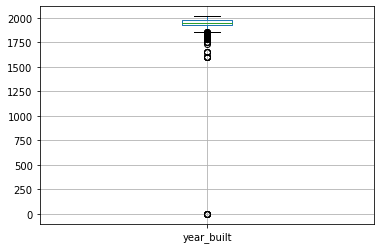

In [12]:
##There is a value 0 in year built, which messed up the distribution
##Need to remove the 0 to see the real distribution
climate_df.boxplot(['year_built'])

<AxesSubplot: >

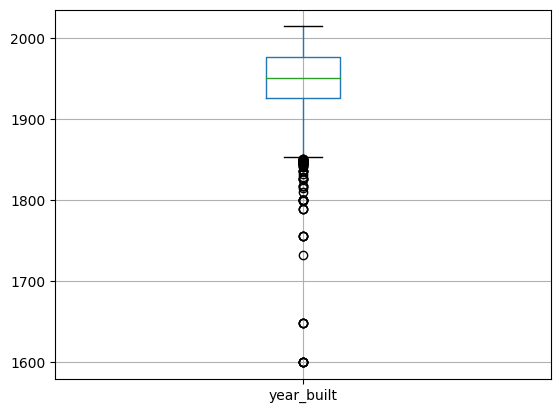

In [13]:
df_temp = climate_df.loc[climate_df['year_built'] != 0]
df_temp.boxplot(['year_built'])

<AxesSubplot: >

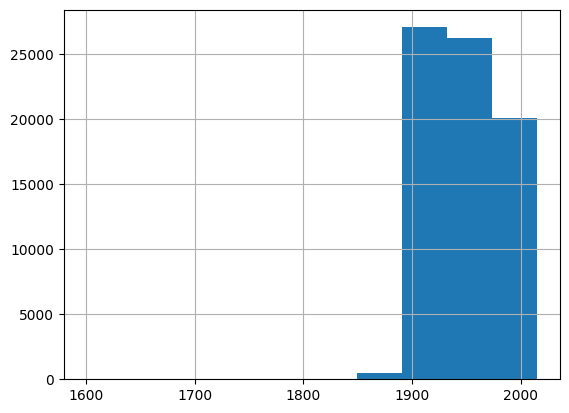

In [14]:
df_temp['year_built'].hist()

In [15]:
##We will fill the year built with median
true_median = df_temp['year_built'].median()

In [16]:
climate_df.loc[(climate_df['year_built'] == 0) | (climate_df['year_built'].isnull()), 'year_built'] = true_median

<AxesSubplot: >

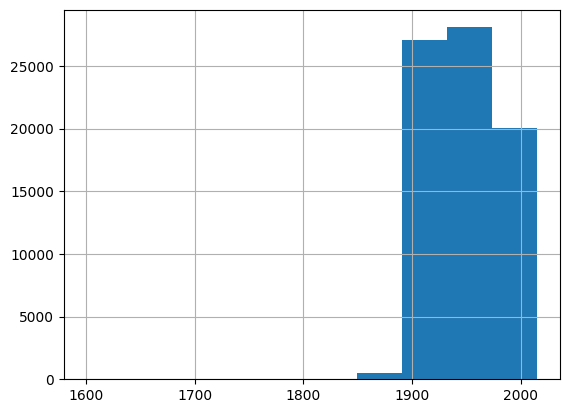

In [17]:
climate_df['year_built'].hist()

#### Days_with_fog

In [27]:
climate_df.shape

(75757, 9)

In [28]:
climate_df.to_numpy()

array([[0, 'Commercial', 61242.0, ..., 56.97260274, nan, 248.68],
       [1, 'Commercial', 274000.0, ..., 56.97260274, 12.0, 26.5],
       [2, 'Commercial', 280025.0, ..., 56.97260274, 12.0, 24.69],
       ...,
       [75754, 'Commercial', 28072.0, ..., 47.91120219, nan, 48.4],
       [75755, 'Commercial', 53575.0, ..., 47.91120219, nan, 592.02],
       [75756, 'Residential', 23888.0, ..., 49.12739726, nan, 29.15]],
      dtype=object)

In [33]:
##Null values in Days_with_fog: 45796
##Since there are too many null values in this column, I would use KNN Imputer.
##The algo will use K Nearest Neighbors (non-null data) to fill out the null values

##One hot encoding the building class and drop the building id

d_building_class = pd.get_dummies(climate_df['building_class'], prefix = 'building_class')
climate_df2 = pd.concat([climate_df, d_building_class], axis=1)
climate_df2.drop(columns = ['building_class', 'id'], inplace = True)
climate_df2 = climate_df2[['building_class_Commercial', 'building_class_Residential', 'floor_area', 
                           'year_built', 'precipitation_inches', 'snowfall_inches', 
                           'avg_temp', 'days_with_fog', 'site_eui']]
climate_df2

,building_class_Commercial,building_class_Residential,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,1,0,61242.0,1942.0,16.59,0.0,56.972603,NaN,248.68
1,1,0,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50
2,1,0,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69
3,1,0,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41
4,1,0,66000.0,1985.0,16.59,0.0,56.972603,NaN,3.90
...,...,...,...,...,...,...,...,...,...
75752,1,0,20410.0,1995.0,45.03,1.4,55.147541,NaN,132.92
75753,0,1,40489.0,1910.0,45.03,1.4,55.147541,NaN,39.48
75754,1,0,28072.0,1917.0,106.32,36.6,47.911202,NaN,48.40
75755,1,0,53575.0,2012.0,106.32,36.6,47.911202,NaN,592.02


In [38]:
imputer = KNNImputer(n_neighbors = 150, weights = 'distance')
X = climate_df2.to_numpy()
data_filled = imputer.fit_transform(X)

In [42]:
cols = ['building_class_Commercial', 'building_class_Residential', 'floor_area', 'year_built', 'precipitation_inches', 
        'snowfall_inches', 'avg_temp', 'days_with_fog', 'site_eui']
climate_df_full = pd.DataFrame(data = data_filled, columns = cols)
climate_df_full = pd.concat([climate_df_full, climate_df['id']], axis=1)
climate_df_full = climate_df_full[['id'] + cols] 

In [43]:
climate_df_full

,id,building_class_Commercial,building_class_Residential,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,0,1.0,0.0,61242.0,1942.0,16.59,0.0,56.972603,105.057321,248.68
1,1,1.0,0.0,274000.0,1955.0,16.59,0.0,56.972603,12.000000,26.50
2,2,1.0,0.0,280025.0,1951.0,16.59,0.0,56.972603,12.000000,24.69
3,3,1.0,0.0,55325.0,1980.0,16.59,0.0,56.972603,12.000000,48.41
4,4,1.0,0.0,66000.0,1985.0,16.59,0.0,56.972603,96.074771,3.90
...,...,...,...,...,...,...,...,...,...,...
75752,75752,1.0,0.0,20410.0,1995.0,45.03,1.4,55.147541,204.663142,132.92
75753,75753,0.0,1.0,40489.0,1910.0,45.03,1.4,55.147541,163.206525,39.48
75754,75754,1.0,0.0,28072.0,1917.0,106.32,36.6,47.911202,182.084503,48.40
75755,75755,1.0,0.0,53575.0,2012.0,106.32,36.6,47.911202,106.260803,592.02


In [45]:
for col in climate_df_full.columns.tolist():
    print("Null in "+ col + ": {}".format(climate_df_full[col].isnull().sum()))

Null in id: 0
Null in building_class_Commercial: 0
Null in building_class_Residential: 0
Null in floor_area: 0
Null in year_built: 0
Null in precipitation_inches: 0
Null in snowfall_inches: 0
Null in avg_temp: 0
Null in days_with_fog: 0
Null in site_eui: 0


## 6. Find and remove duplicate variables

In [50]:
climate_df_full.shape

(75757, 10)

In [49]:
##We do not include building ids since they are all unqiue
climate_df_full.loc[climate_df_full[cols].duplicated(keep = False)]

,id,building_class_Commercial,building_class_Residential,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
1000,1000,1.0,0.0,44593.0,1951.0,19.27,0.0,60.247268,140.431273,40.34
1002,1002,1.0,0.0,44593.0,1951.0,19.27,0.0,60.247268,140.431273,40.34
1097,1097,1.0,0.0,74125.0,1951.0,4.17,0.0,64.441096,101.485038,56.78
1098,1098,1.0,0.0,74125.0,1951.0,4.17,0.0,64.441096,101.485038,56.78
1099,1099,1.0,0.0,74125.0,1951.0,4.17,0.0,64.441096,101.485038,56.78
...,...,...,...,...,...,...,...,...,...,...
63088,63088,0.0,1.0,876500.0,1964.0,42.17,36.0,57.215847,125.653094,110.00
64856,64856,0.0,1.0,86570.0,1925.0,42.17,36.0,57.215847,105.715195,79.78
64857,64857,0.0,1.0,86570.0,1925.0,42.17,36.0,57.215847,105.715195,79.78
65290,65290,1.0,0.0,311551.0,1969.0,42.17,36.0,57.215847,109.665114,26.73


In [53]:
climate_df_full.drop_duplicates(subset = cols, keep = 'first', inplace = True)

In [54]:
climate_df_full

,id,building_class_Commercial,building_class_Residential,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,0,1.0,0.0,61242.0,1942.0,16.59,0.0,56.972603,105.057321,248.68
1,1,1.0,0.0,274000.0,1955.0,16.59,0.0,56.972603,12.000000,26.50
2,2,1.0,0.0,280025.0,1951.0,16.59,0.0,56.972603,12.000000,24.69
3,3,1.0,0.0,55325.0,1980.0,16.59,0.0,56.972603,12.000000,48.41
4,4,1.0,0.0,66000.0,1985.0,16.59,0.0,56.972603,96.074771,3.90
...,...,...,...,...,...,...,...,...,...,...
75752,75752,1.0,0.0,20410.0,1995.0,45.03,1.4,55.147541,204.663142,132.92
75753,75753,0.0,1.0,40489.0,1910.0,45.03,1.4,55.147541,163.206525,39.48
75754,75754,1.0,0.0,28072.0,1917.0,106.32,36.6,47.911202,182.084503,48.40
75755,75755,1.0,0.0,53575.0,2012.0,106.32,36.6,47.911202,106.260803,592.02


In [57]:
climate_df_full.loc[climate_df_full['floor_area'] == 74125.0]

,id,building_class_Commercial,building_class_Residential,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
1097,1097,1.0,0.0,74125.0,1951.0,4.17,0.0,64.441096,101.485038,56.78


## 7. Encode the categorical variables; you can use label encoding, one hot encoding, or...

In [60]:
##I will not encode the building id since all of them are unique variables
##Keep them won't be good too since building id is not rank
climate_df_full = climate_df_full[cols]
climate_df_full

,building_class_Commercial,building_class_Residential,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,1.0,0.0,61242.0,1942.0,16.59,0.0,56.972603,105.057321,248.68
1,1.0,0.0,274000.0,1955.0,16.59,0.0,56.972603,12.000000,26.50
2,1.0,0.0,280025.0,1951.0,16.59,0.0,56.972603,12.000000,24.69
3,1.0,0.0,55325.0,1980.0,16.59,0.0,56.972603,12.000000,48.41
4,1.0,0.0,66000.0,1985.0,16.59,0.0,56.972603,96.074771,3.90
...,...,...,...,...,...,...,...,...,...
75752,1.0,0.0,20410.0,1995.0,45.03,1.4,55.147541,204.663142,132.92
75753,0.0,1.0,40489.0,1910.0,45.03,1.4,55.147541,163.206525,39.48
75754,1.0,0.0,28072.0,1917.0,106.32,36.6,47.911202,182.084503,48.40
75755,1.0,0.0,53575.0,2012.0,106.32,36.6,47.911202,106.260803,592.02


## 8. Create the boxplot and show the outlier.

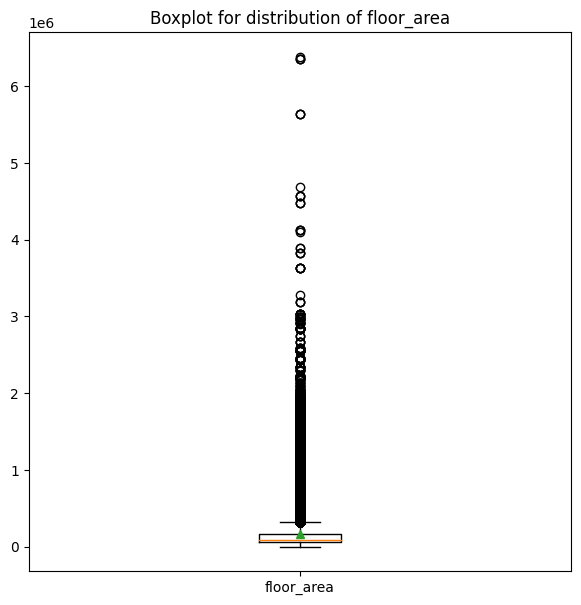

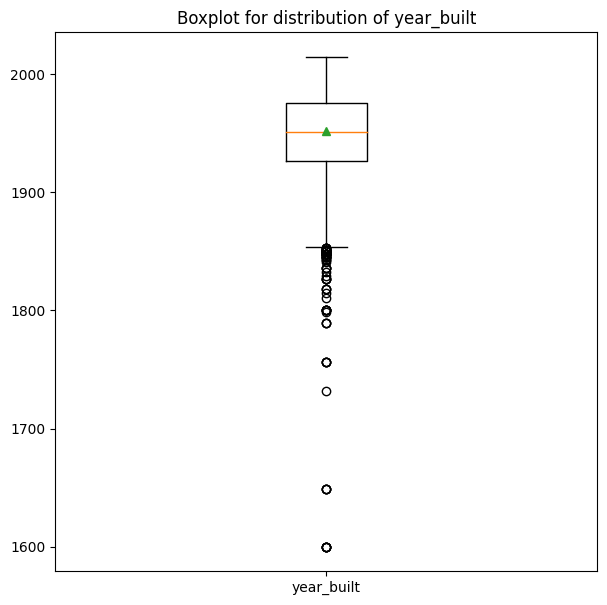

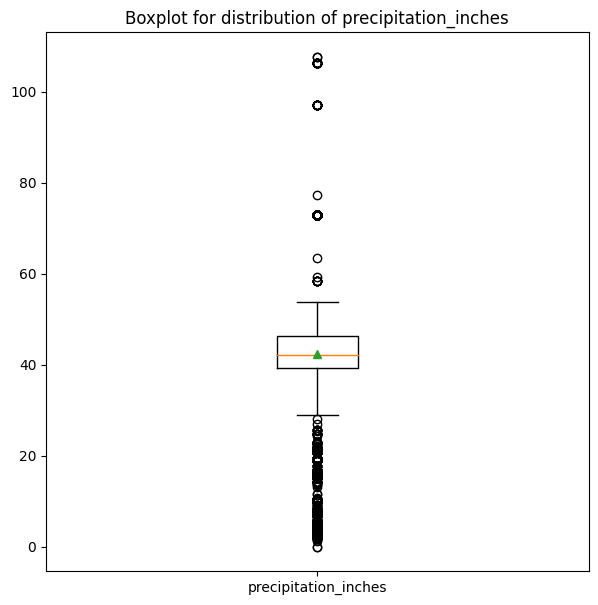

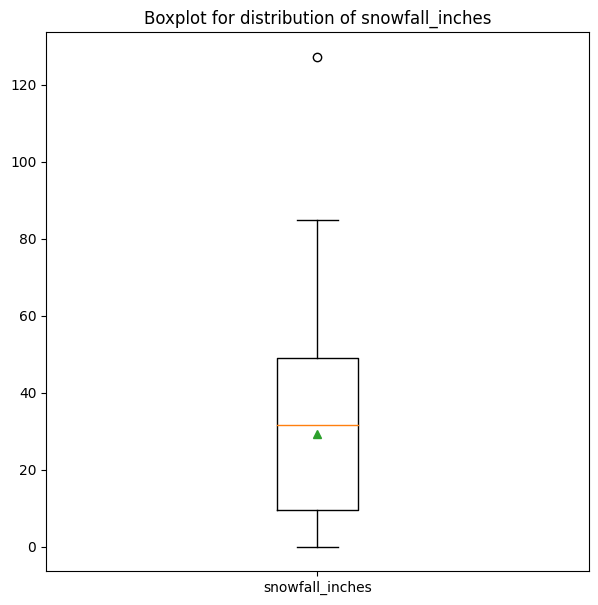

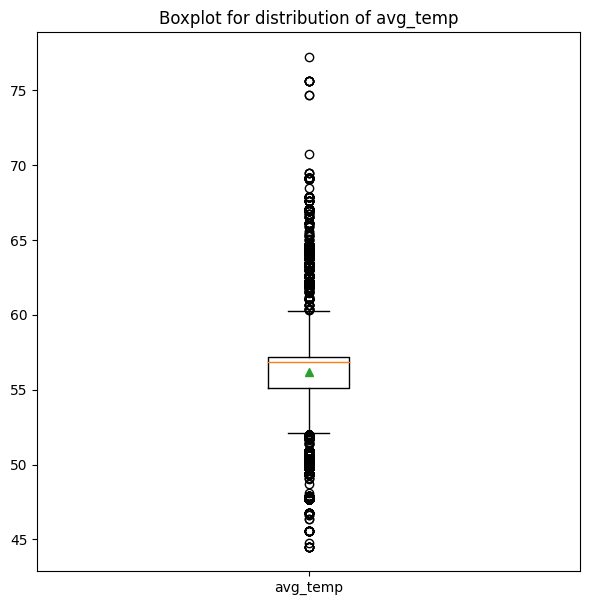

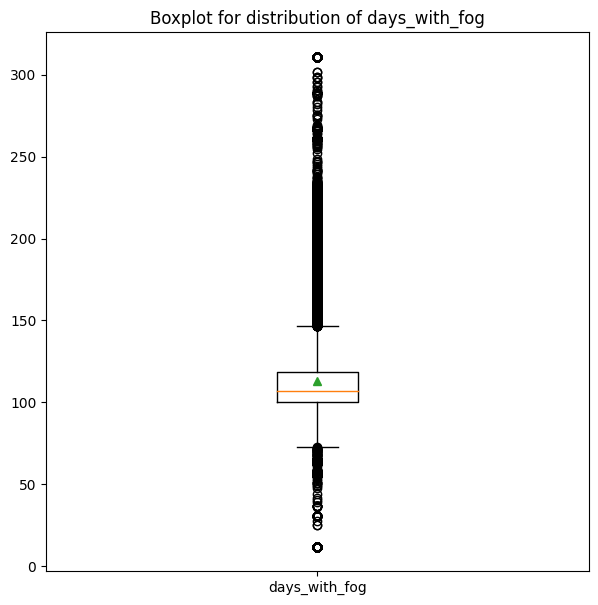

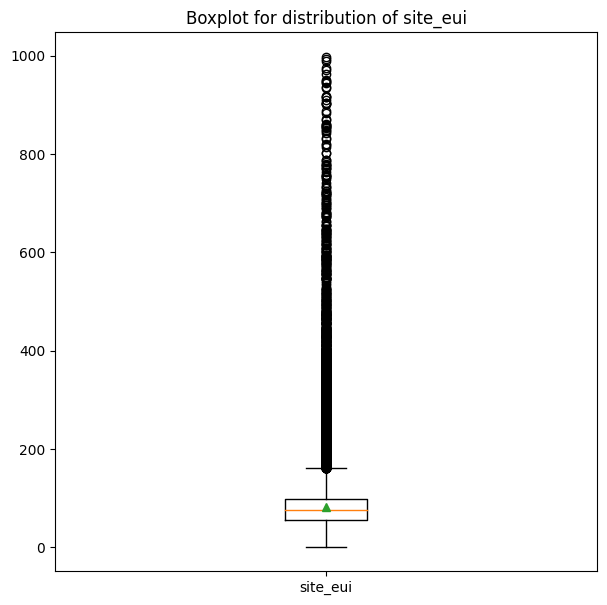

In [66]:
columns_2 = ['floor_area', 'year_built', 'precipitation_inches', 'snowfall_inches', 
             'avg_temp', 'days_with_fog', 'site_eui']
for col in columns_2:
    plt.figure(figsize = (7, 7))
    plt.boxplot(climate_df_full[col], showfliers = True, vert = True, showmeans = True)
    plt.title('Boxplot for distribution of ' + col)
    plt.xticks(ticks = [1], labels = [col])
    plt.show()

## 9. Create the histogram and check the outliers.

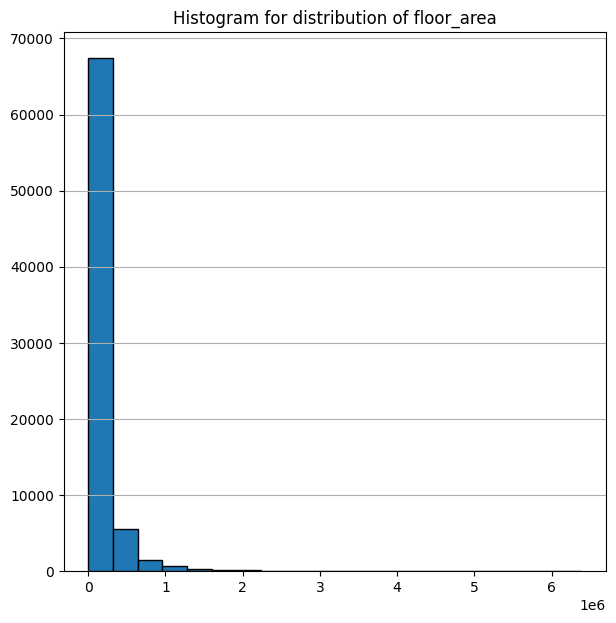

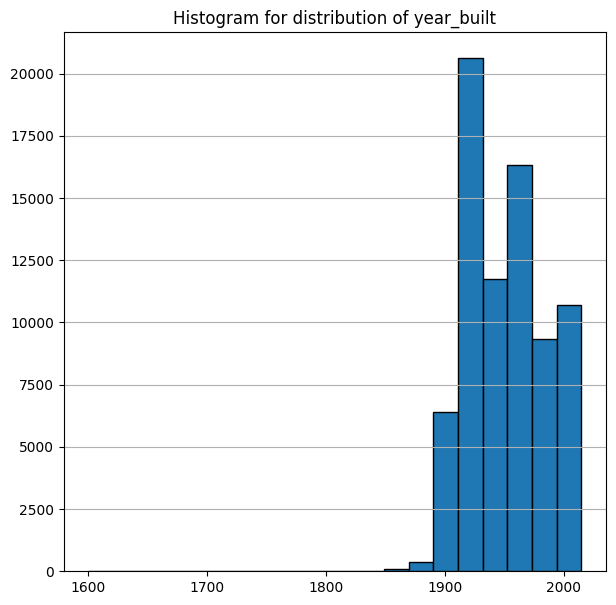

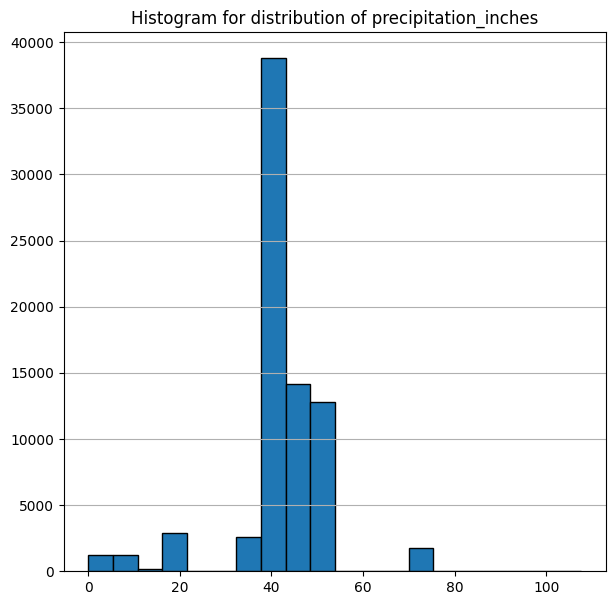

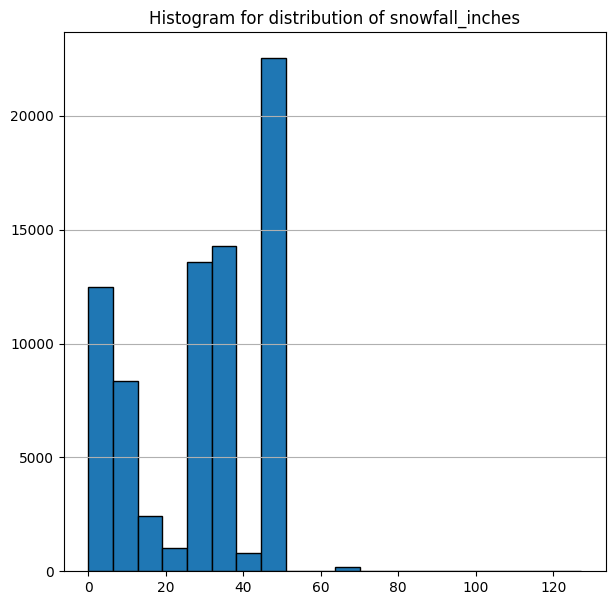

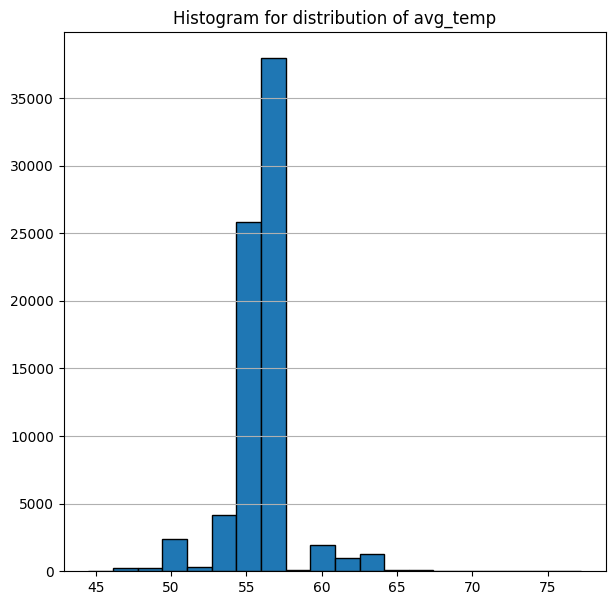

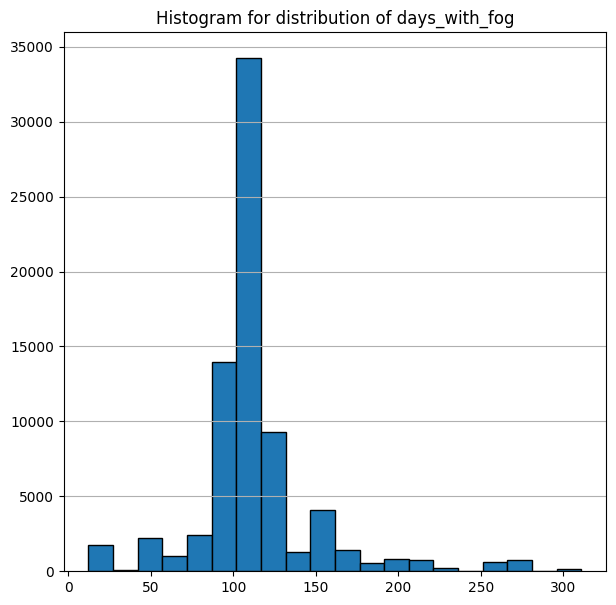

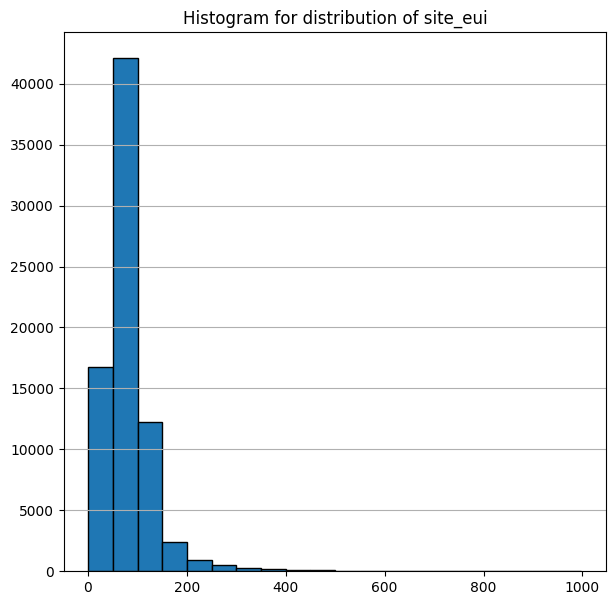

In [70]:
columns_2 = ['floor_area', 'year_built', 'precipitation_inches', 'snowfall_inches', 
             'avg_temp', 'days_with_fog', 'site_eui']
for col in columns_2:
    plt.figure(figsize = (7, 7))
    plt.hist(climate_df_full[col], bins = 20, edgecolor = 'black')
    plt.title('Histogram for distribution of ' + col)
    plt.grid(axis = 'y')
    plt.show()
    
##For precipitation inches, snowfall inches, there are a few bins that are far away.

## If feature scaling is needed, do it, please.

In [77]:
##Since all the features here are on different scales, I will scale them into the range 0 to 1
##So the ML will treat all variables equally
df_scaled = climate_df_full.copy()
for col in columns_2:
    scaler = MinMaxScaler()
    col_transformed = scaler.fit_transform(df_scaled[col].to_numpy().reshape(-1, 1))
    df_scaled[col] = col_transformed

In [78]:
df_scaled

,building_class_Commercial,building_class_Residential,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,1.0,0.0,0.009445,0.824096,0.154053,0.000000,0.380665,0.311228,0.248458
1,1.0,0.0,0.042769,0.855422,0.154053,0.000000,0.380665,0.000000,0.025580
2,1.0,0.0,0.043713,0.845783,0.154053,0.000000,0.380665,0.000000,0.023764
3,1.0,0.0,0.008518,0.915663,0.154053,0.000000,0.380665,0.000000,0.047559
4,1.0,0.0,0.010190,0.927711,0.154053,0.000000,0.380665,0.281187,0.002909
...,...,...,...,...,...,...,...,...,...
75752,1.0,0.0,0.003049,0.951807,0.418145,0.010998,0.324909,0.644358,0.132334
75753,0.0,1.0,0.006194,0.746988,0.418145,0.010998,0.324909,0.505707,0.038601
75754,1.0,0.0,0.004249,0.763855,0.987278,0.287510,0.103837,0.568844,0.047549
75755,1.0,0.0,0.008244,0.992771,0.987278,0.287510,0.103837,0.315254,0.592876


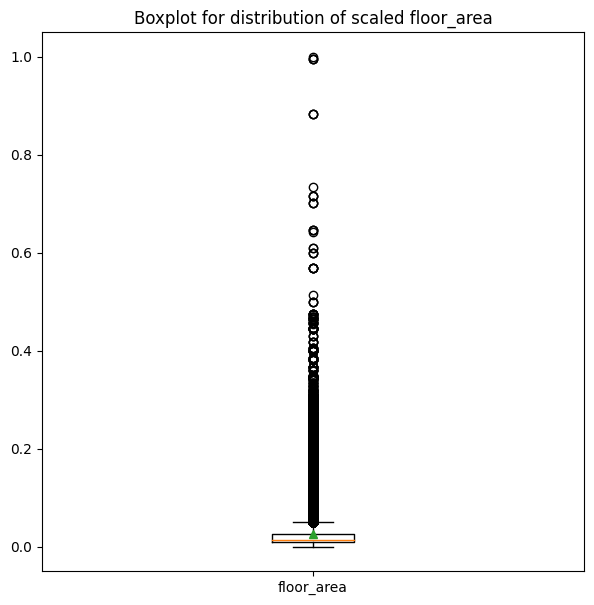

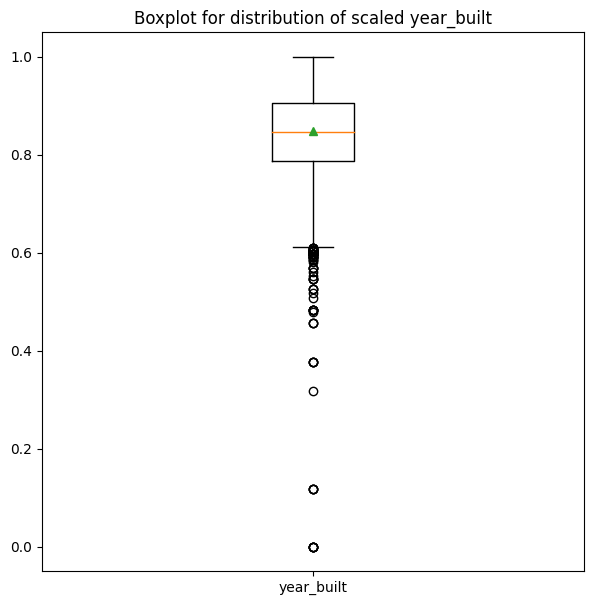

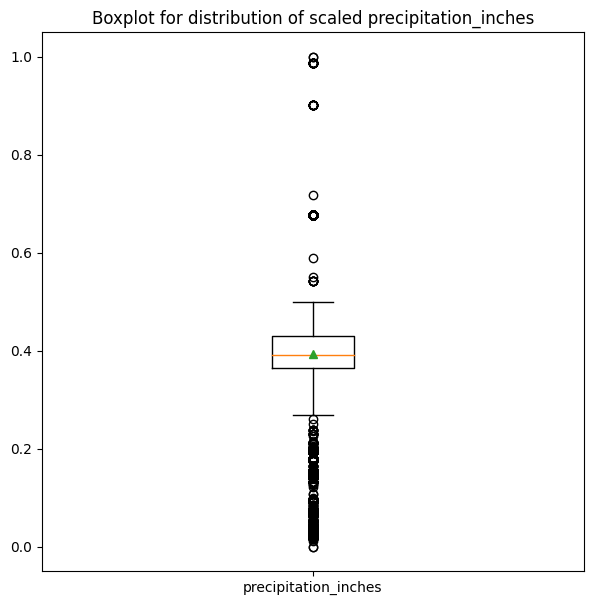

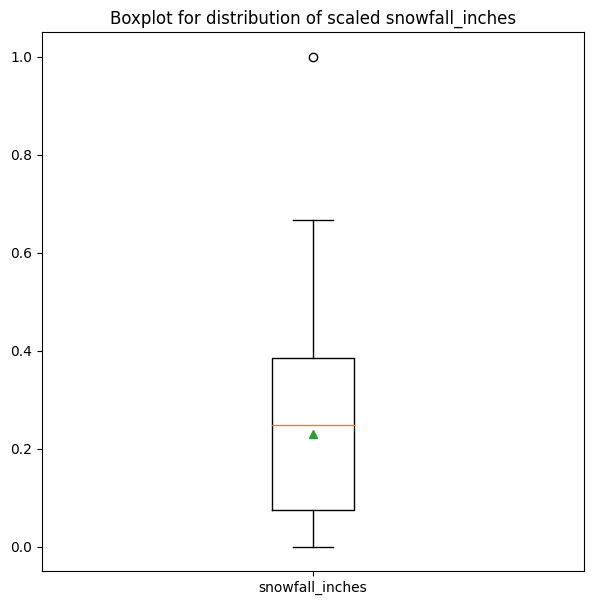

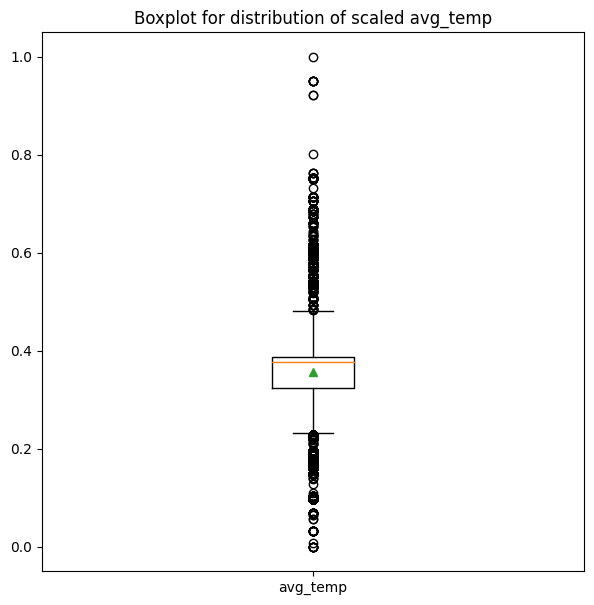

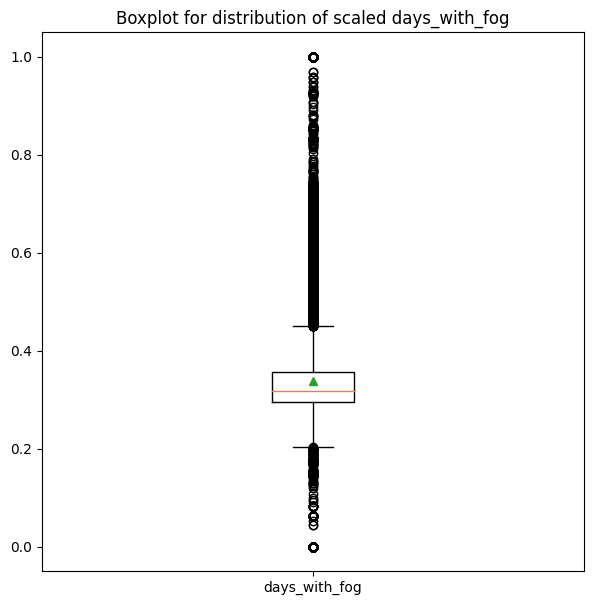

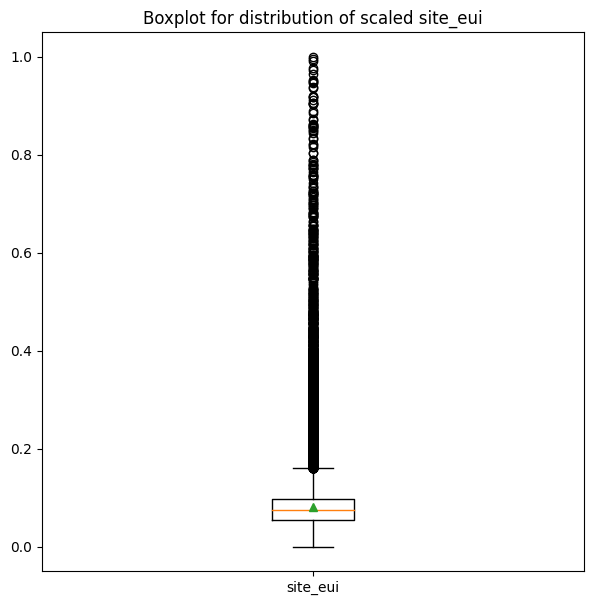

In [79]:
columns_2 = ['floor_area', 'year_built', 'precipitation_inches', 'snowfall_inches', 
             'avg_temp', 'days_with_fog', 'site_eui']
for col in columns_2:
    plt.figure(figsize = (7, 7))
    plt.boxplot(df_scaled[col], showfliers = True, vert = True, showmeans = True)
    plt.title('Boxplot for distribution of scaled ' + col)
    plt.xticks(ticks = [1], labels = [col])
    plt.show()

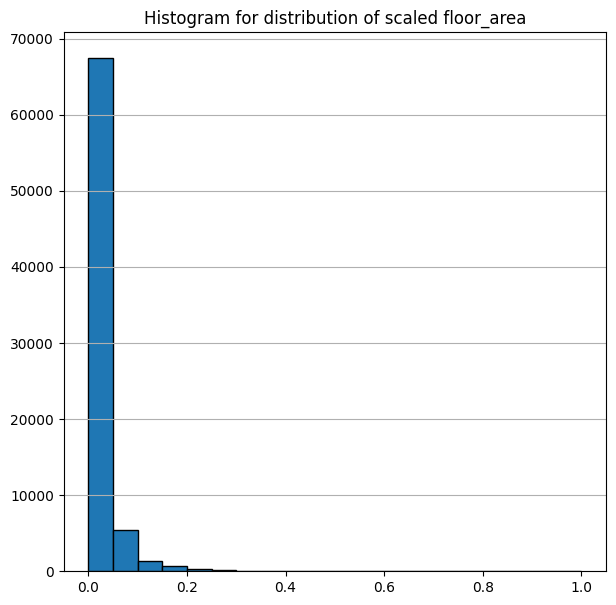

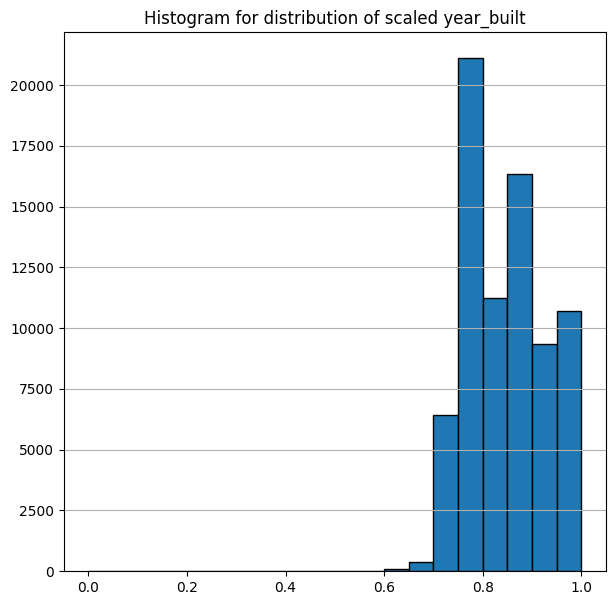

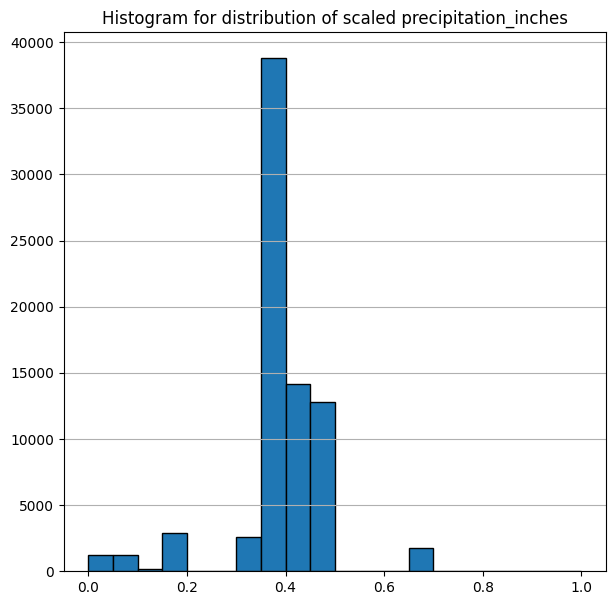

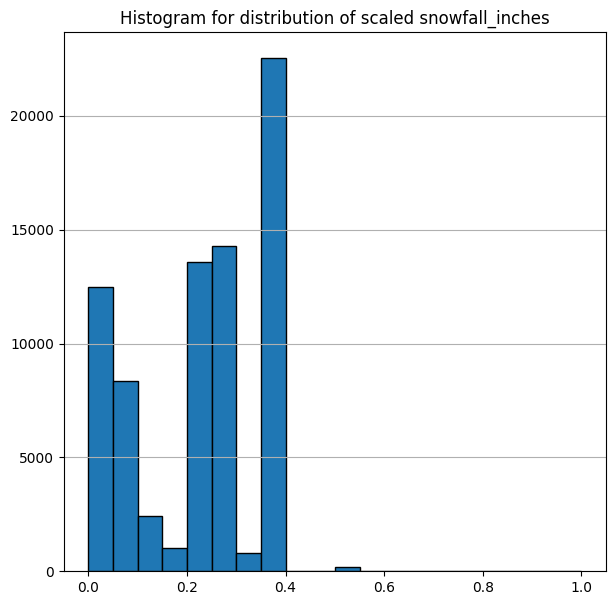

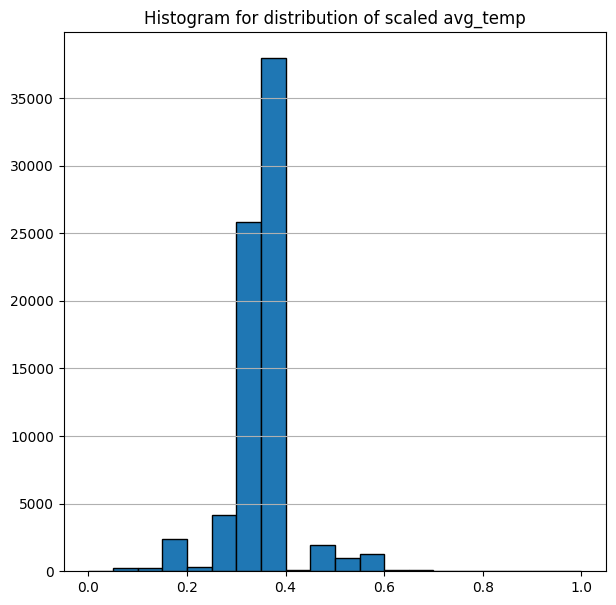

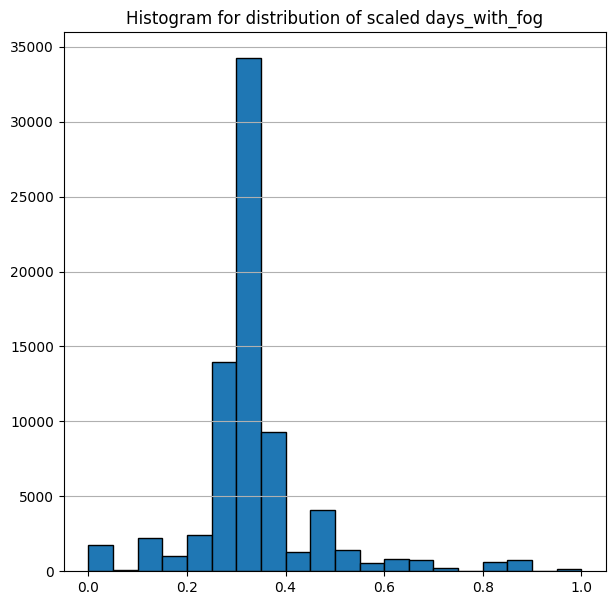

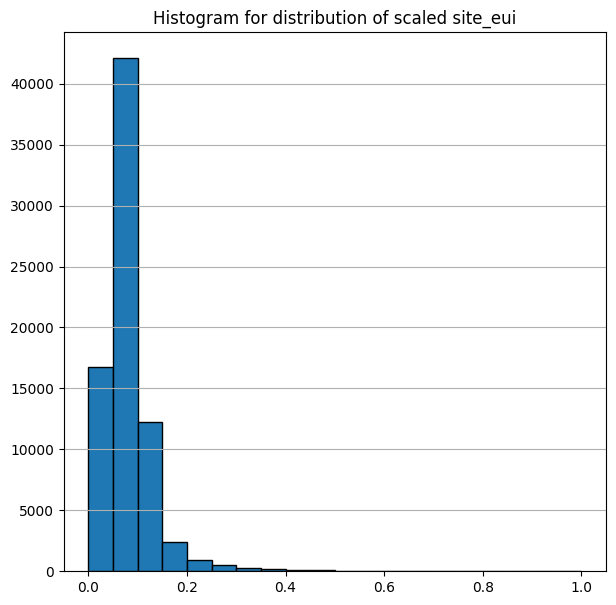

In [80]:
for col in columns_2:
    plt.figure(figsize = (7, 7))
    plt.hist(df_scaled[col], bins = 20, edgecolor = 'black')
    plt.title('Histogram for distribution of scaled ' + col)
    plt.grid(axis = 'y')
    plt.show()
    